In [9]:
from fly_analysis import braidz
from fly_analysis import filtering
from fly_analysis.processing import extract_stimulus_centered_data
import numpy as np
from matplotlib import pyplot as plt
from fly_analysis.plotting import plot_mean_and_std
from fly_analysis.plotting import plot_trajectory
from datetime import datetime
from scipy import stats
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
from scipy.stats import kruskal
from scipy.stats import friedmanchisquare
import pandas as pd

In [10]:
df, csvs = braidz.read_braidz(r"C:\\Users\\pandey\\Desktop\\Braidz Files\\20240913_141235.braidz")

Reading C:\\Users\\pandey\\Desktop\\Braidz Files\\20240913_141235.braidz using pyarrow


In [11]:
df,csvs["opto"]

(          obj_id    frame     timestamp         x         y         z  \
 0              0   100014  1.726230e+09 -0.170874  0.081477 -0.001250   
 1              0   100015  1.726230e+09 -0.170553  0.081322 -0.001802   
 2              0   100016  1.726230e+09 -0.170763  0.081363 -0.001628   
 3              0   100017  1.726230e+09 -0.170888  0.081432 -0.001412   
 4              0   100018  1.726230e+09 -0.170916  0.081466 -0.001286   
 ...          ...      ...           ...       ...       ...       ...   
 10281979  140930  8289281  1.726312e+09 -0.013394  0.088836 -0.004328   
 10281980  140930  8289282  1.726312e+09 -0.013526  0.088754 -0.004341   
 10281981  140930  8289283  1.726312e+09 -0.013657  0.088689 -0.004367   
 10281982  140930  8289284  1.726312e+09 -0.013766  0.088653 -0.004357   
 10281983  140930  8289285  1.726312e+09 -0.013866  0.088608 -0.004349   
 
               xvel      yvel      zvel           P00           P01  \
 0        -0.001498 -0.000098 -0.000465

In [12]:
timestamps = []
for idx, row in csvs["opto"].iterrows():
    obj_id = int(row.obj_id)
    frame = int(row.frame)

    timestamps.append(df[(df.obj_id == obj_id) & (df.frame == frame)].timestamp.values)

In [13]:
data = extract_stimulus_centered_data(df, csvs["opto"])

In [14]:
median_obj_id = filtering.filter_by_median_position(df, xlim=[-0.2, 0.2], ylim=[-0.2, 0.2], zlim=[0.1, 0.3])
duration_obj_id = filtering.filter_by_duration(df, threshold=5)

shared_elements = set(median_obj_id) & set(duration_obj_id)
shared_elements

{1561,
 2596,
 2650,
 3338,
 4857,
 5075,
 5909,
 6197,
 6623,
 7449,
 9948,
 10751,
 15875,
 16913,
 17420,
 29861,
 56379,
 56973,
 63785,
 68144,
 72867,
 83556,
 88952,
 95846,
 98773,
 100583,
 100711,
 105010,
 105288,
 129856,
 130202,
 131446,
 132334,
 134053,
 134161,
 135299,
 138116,
 138380,
 139148,
 139737,
 139740}

In [15]:
# Inspect the structure of the dictionary
print("Keys in the dictionary:", data.keys())

# Print the first few entries to check the format of position values
for key, value in list(data.items())[:5]:  # Display only the first 5 entries
    print(f"Key: {key}, Value: {value}")


Keys in the dictionary: dict_keys(['angular_velocity', 'linear_velocity', 'position', 'timestamps'])
Key: angular_velocity, Value: [array([ 3.81064983e+01, -8.04129594e+01, -1.58301812e+02, -1.92927885e+02,
       -2.45679509e+02, -1.29201783e+02, -8.24729846e+00,  5.99603561e+01,
        9.72015384e+01,  1.12212318e+02,  1.46975569e+02,  4.46453631e+01,
       -3.10878406e+01,  4.83149976e+01,  1.34287786e+02,  9.63386772e+01,
        5.88883033e+01,  9.87613467e+01,  2.32161025e+01, -1.70842837e+01,
       -1.62721869e+00, -3.23445651e+01, -1.56554046e+01,  4.63251487e+01,
        2.86428239e+01,  2.88429690e+01,  1.18143331e+02,  9.96789002e+01,
        9.72038150e+01,  9.47356058e+01, -6.76839670e+01, -2.07770070e+02,
       -1.56274444e+02, -8.03081992e+01, -7.19806067e+01, -1.49325476e+01,
        4.72377763e+01,  6.76972073e+01,  7.12111031e+01, -1.73596284e+01,
       -9.26044666e+01, -1.38114380e+02, -1.59882695e+02, -1.24680803e+02,
       -6.50345734e+01, -1.96019112e+01,  1

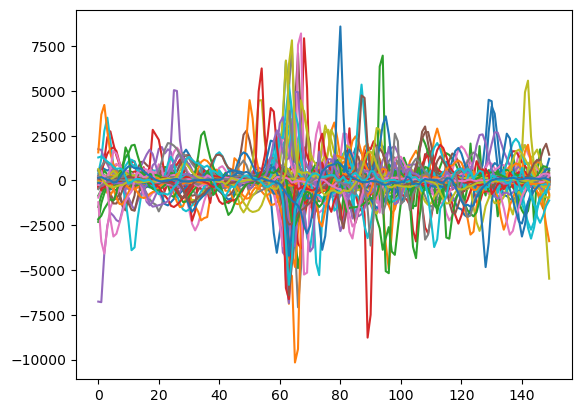

In [16]:
fig = plt.figure()
for d in data["angular_velocity"]:
    plt.plot(d)
plt.show()

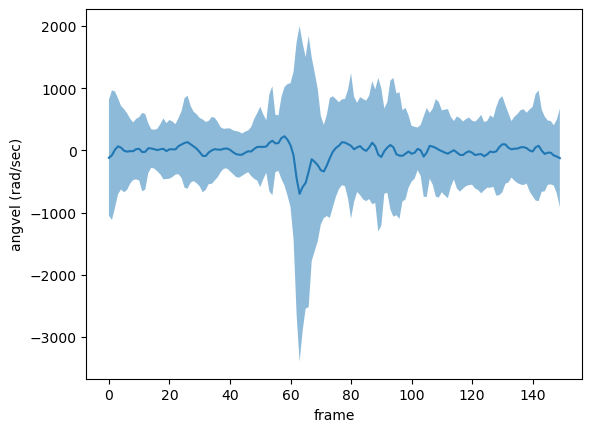

In [17]:
fig, ax = plt.subplots()
plot_mean_and_std(np.array(data["angular_velocity"]), ax=ax)
ax.set_xlabel("frame")
ax.set_ylabel("angvel (rad/sec)")
plt.show()

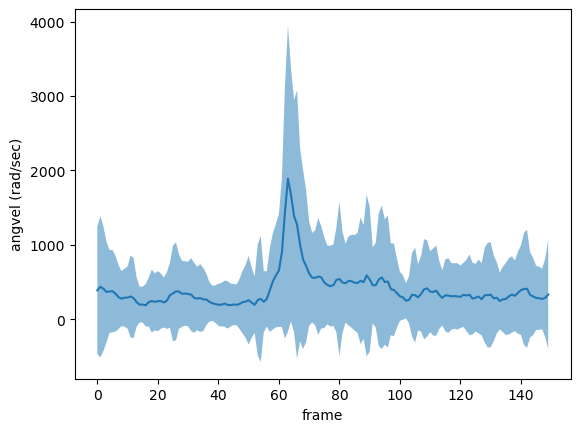

In [18]:
fig, ax = plt.subplots()
plot_mean_and_std(np.abs(np.array(data["angular_velocity"])), ax=ax)
ax.set_xlabel("frame")
ax.set_ylabel("angvel (rad/sec)")
plt.show()

<Axes: >

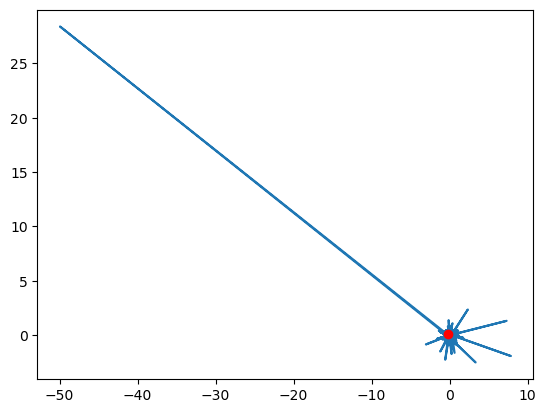

In [19]:
plot_trajectory(df)

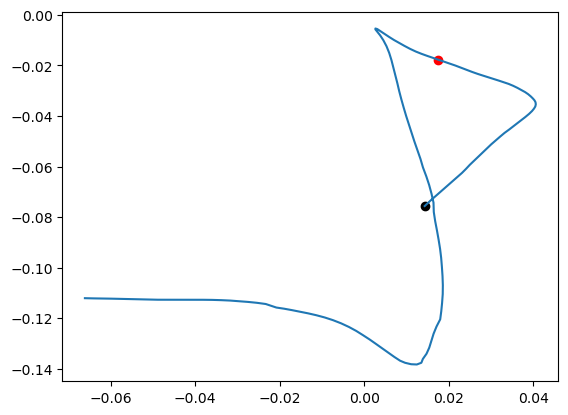

In [20]:
i = 7
traj = data["position"][i]

fig = plt.figure()
plt.plot(traj[:,0], traj[:,1])
plt.scatter(traj[50,0], traj[50,1], color="red")
plt.scatter(traj[0,0], traj[0,1], color="black")
plt.show()

In [21]:
data1_max = np.max(np.abs(np.asarray(data["angular_velocity"])[:, 50:80]), axis=1)

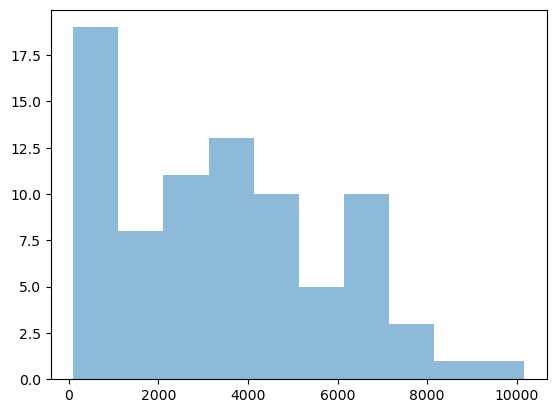

In [22]:
plt.figure()
plt.hist(data1_max, alpha=0.5)
plt.show()

In [23]:
mean_data = np.mean(data1_max)
print(mean_data)
std_dev = np.std(data1_max, ddof=1)  
std_error = std_dev / np.sqrt(len(data1_max))
print(f"Standard Deviation of data1_max: {std_dev:.4f}")
print(f"Standard Error of data1_max: {std_error:.4f}")

3516.4384704214744
Standard Deviation of data1_max: 2361.6518
Standard Error of data1_max: 262.4058


In [24]:
print(f"Shape of data1_max: {data1_max.shape}")
flattened_data = data1_max.ravel()
print(f"Shape of flattened data: {flattened_data.shape}")
k2, p_value = stats.normaltest(flattened_data)
print(f"D'Agostino's K-squared Test Statistic: {k2}")
print(f"P-value: {p_value}")

Shape of data1_max: (81,)
Shape of flattened data: (81,)
D'Agostino's K-squared Test Statistic: 4.574066933363624
P-value: 0.10156731821656391


In [26]:
AV_Array = np.array(data["angular_velocity"])


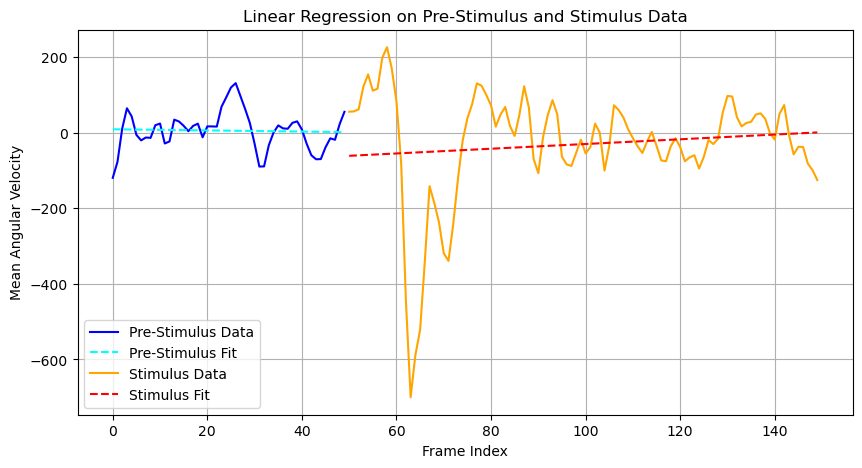

In [27]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Split data into pre-stimulus and stimulus+post-stimulus
pre_stimulus = AV_Array[:, :50].mean(axis=0)
stimulus = AV_Array[:, 50:].mean(axis=0)

# Prepare data for regression (X: frame index, Y: angular velocity)
frames_pre = np.arange(50).reshape(-1, 1)
frames_stim = np.arange(50, 150).reshape(-1, 1)

# Perform linear regression
model_pre = LinearRegression().fit(frames_pre, pre_stimulus)
model_stim = LinearRegression().fit(frames_stim, stimulus)

# Predicted values
predicted_pre = model_pre.predict(frames_pre)
predicted_stim = model_stim.predict(frames_stim)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(frames_pre, pre_stimulus, label="Pre-Stimulus Data", color='blue')
plt.plot(frames_pre, predicted_pre, label="Pre-Stimulus Fit", linestyle="--", color='cyan')
plt.plot(frames_stim, stimulus, label="Stimulus Data", color='orange')
plt.plot(frames_stim, predicted_stim, label="Stimulus Fit", linestyle="--", color='red')
plt.xlabel("Frame Index")
plt.ylabel("Mean Angular Velocity")
plt.title("Linear Regression on Pre-Stimulus and Stimulus Data")
plt.legend()
plt.grid()
plt.show()


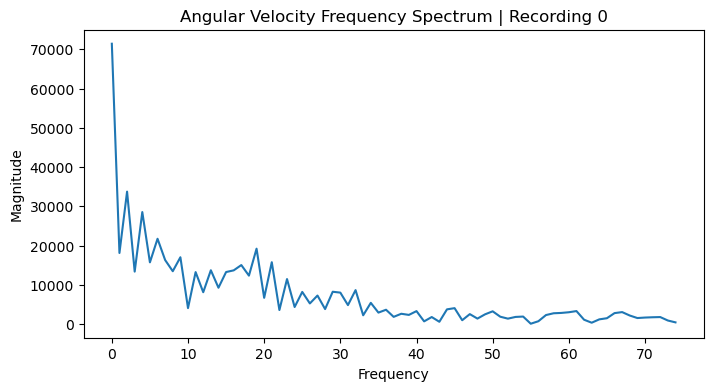

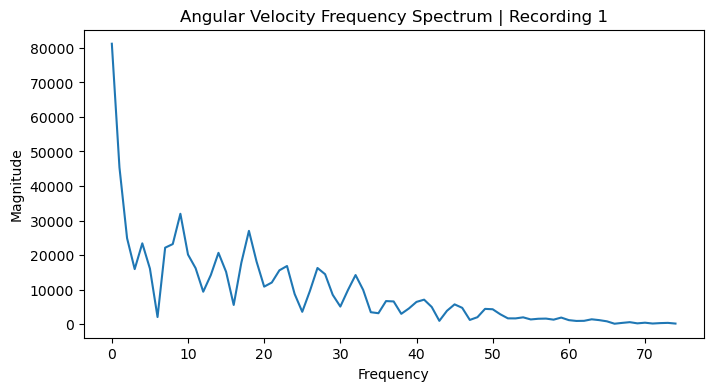

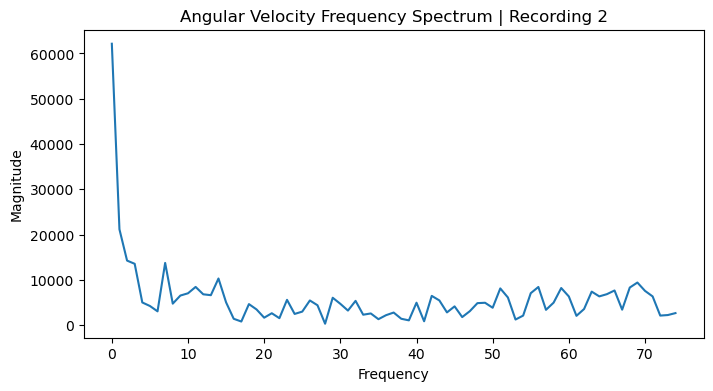

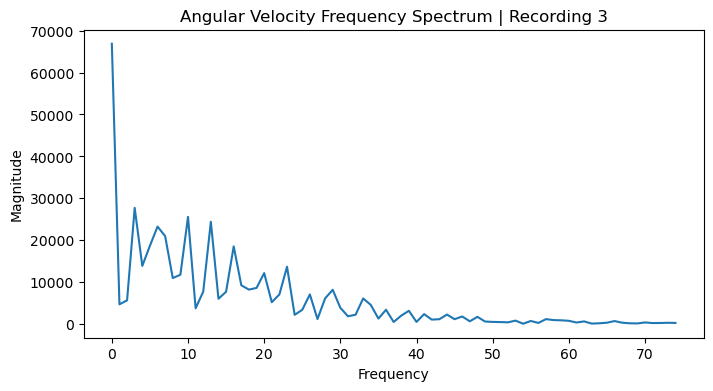

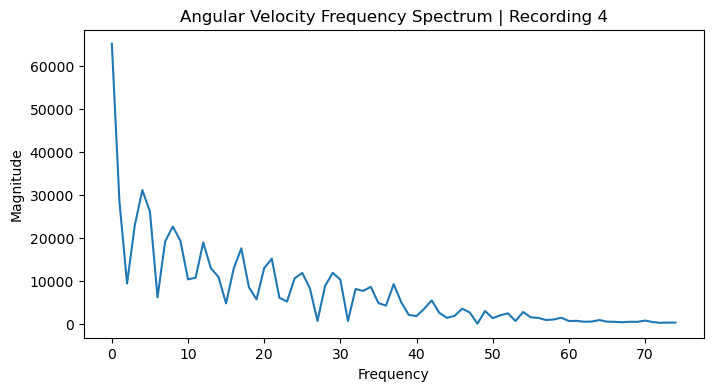

In [29]:
from scipy.fft import fft

def plot_fft(data, label):
    num_recordings = data.shape[0]
    for i in range(min(num_recordings, 5)):  # Limit to 5 plots
        signal = data[i]
        freq = fft(signal)
        freq_magnitude = np.abs(freq)[:len(signal) // 2]
        plt.figure(figsize=(8, 4))
        plt.plot(freq_magnitude)
        plt.title(f"{label} Frequency Spectrum | Recording {i}")
        plt.xlabel("Frequency")
        plt.ylabel("Magnitude")
        plt.show()

plot_fft(AV_Array_abs, "Angular Velocity")


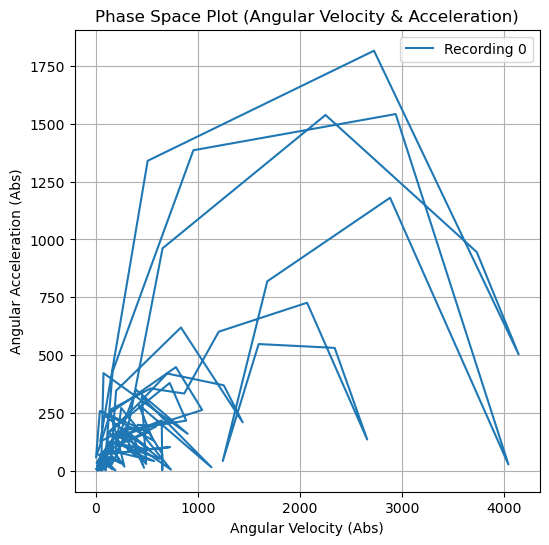

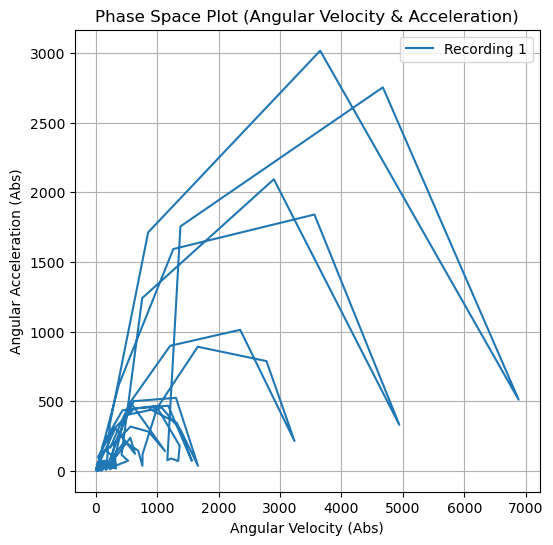

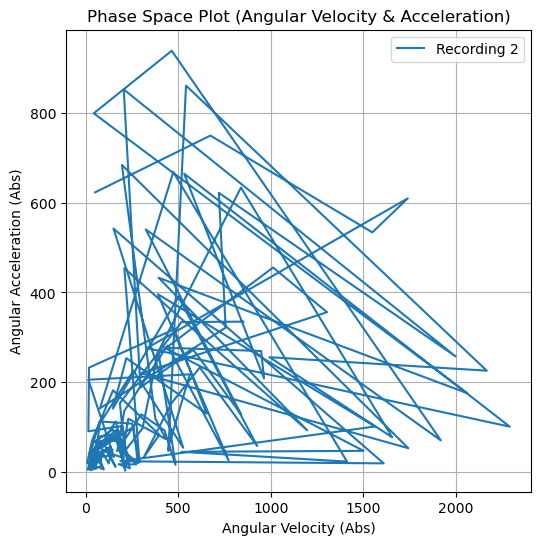

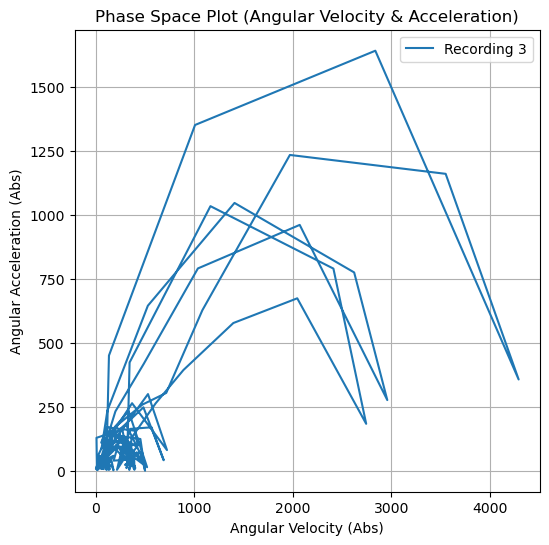

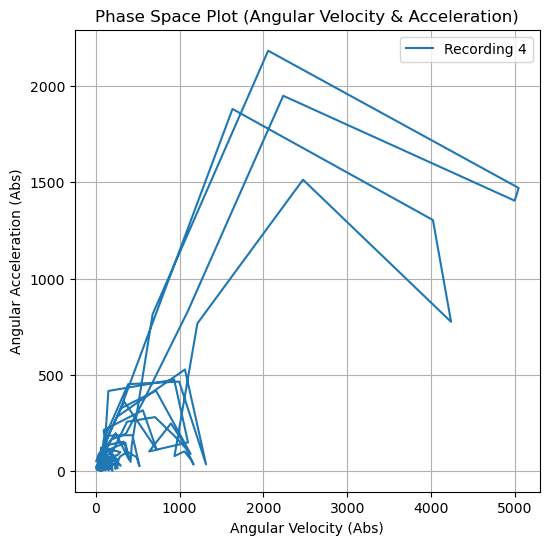

In [30]:
def plot_phase_space(velocity, acceleration, label):
    for i in range(min(velocity.shape[0], 5)):
        plt.figure(figsize=(6, 6))
        plt.plot(velocity[i], acceleration[i], label=f"Recording {i}")
        plt.title(f"Phase Space Plot ({label})")
        plt.xlabel("Angular Velocity (Abs)")
        plt.ylabel("Angular Acceleration (Abs)")
        plt.legend()
        plt.grid()
        plt.show()

plot_phase_space(AV_Array_abs, Acceleration_abs, "Angular Velocity & Acceleration")


Mean Correlation (Angular Velocity vs Acceleration): 0.649


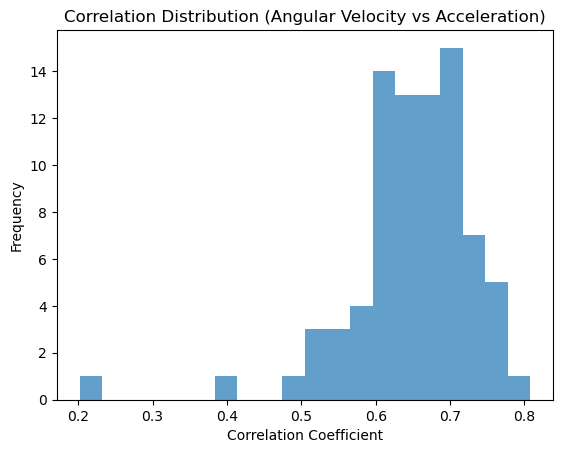

In [31]:
def correlation_analysis(data1, data2, label1, label2):
    corr_values = [np.corrcoef(data1[i], data2[i])[0, 1] for i in range(data1.shape[0])]
    print(f"Mean Correlation ({label1} vs {label2}): {np.mean(corr_values):.3f}")
    plt.hist(corr_values, bins=20, alpha=0.7)
    plt.title(f"Correlation Distribution ({label1} vs {label2})")
    plt.xlabel("Correlation Coefficient")
    plt.ylabel("Frequency")
    plt.show()

correlation_analysis(AV_Array_abs, Acceleration_abs, "Angular Velocity", "Acceleration")


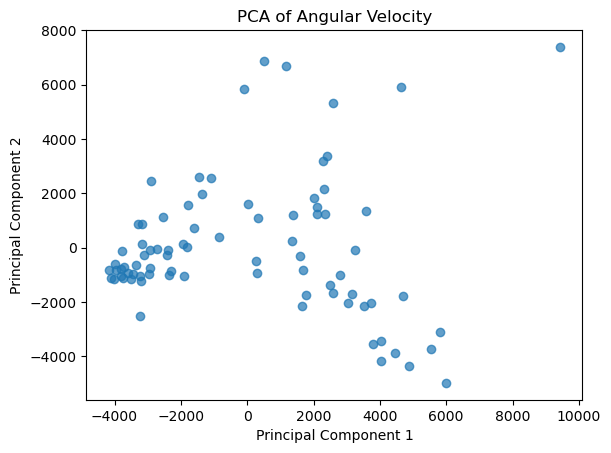

In [32]:
from sklearn.decomposition import PCA

def apply_pca(data, label):
    pca = PCA(n_components=2)
    flattened_data = data.reshape(data.shape[0], -1)
    principal_components = pca.fit_transform(flattened_data)
    plt.scatter(principal_components[:, 0], principal_components[:, 1], alpha=0.7)
    plt.title(f"PCA of {label}")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.show()

apply_pca(AV_Array_abs, "Angular Velocity")


In [37]:
from scipy.stats import ttest_ind

def statistical_test(data, stimulus_split, label):
    pre_stimulus = data[:, :stimulus_split[0]]
    stimulus = data[:, stimulus_split[0]:stimulus_split[1]]
    t_stat, p_value = ttest_ind(pre_stimulus.flatten(), stimulus.flatten())
    print(f"T-test ({label}): T-stat = {t_stat:.3f}, P-value = {p_value:.3f}")

statistical_test(AV_Array_abs, stimulus_split, "Angular Velocity")




T-test (Angular Velocity): T-stat = -19.222, P-value = 0.000
